## 참고사이트 : https://aiopen.etri.re.kr/guide/od
### 계정 java@dataworld.co.kr Java6****
## 참고사이트 : https://aihub.or.kr/
### 계정 java@dataworld.co.kr Java6**** 네이버게정과 연동되어 있음
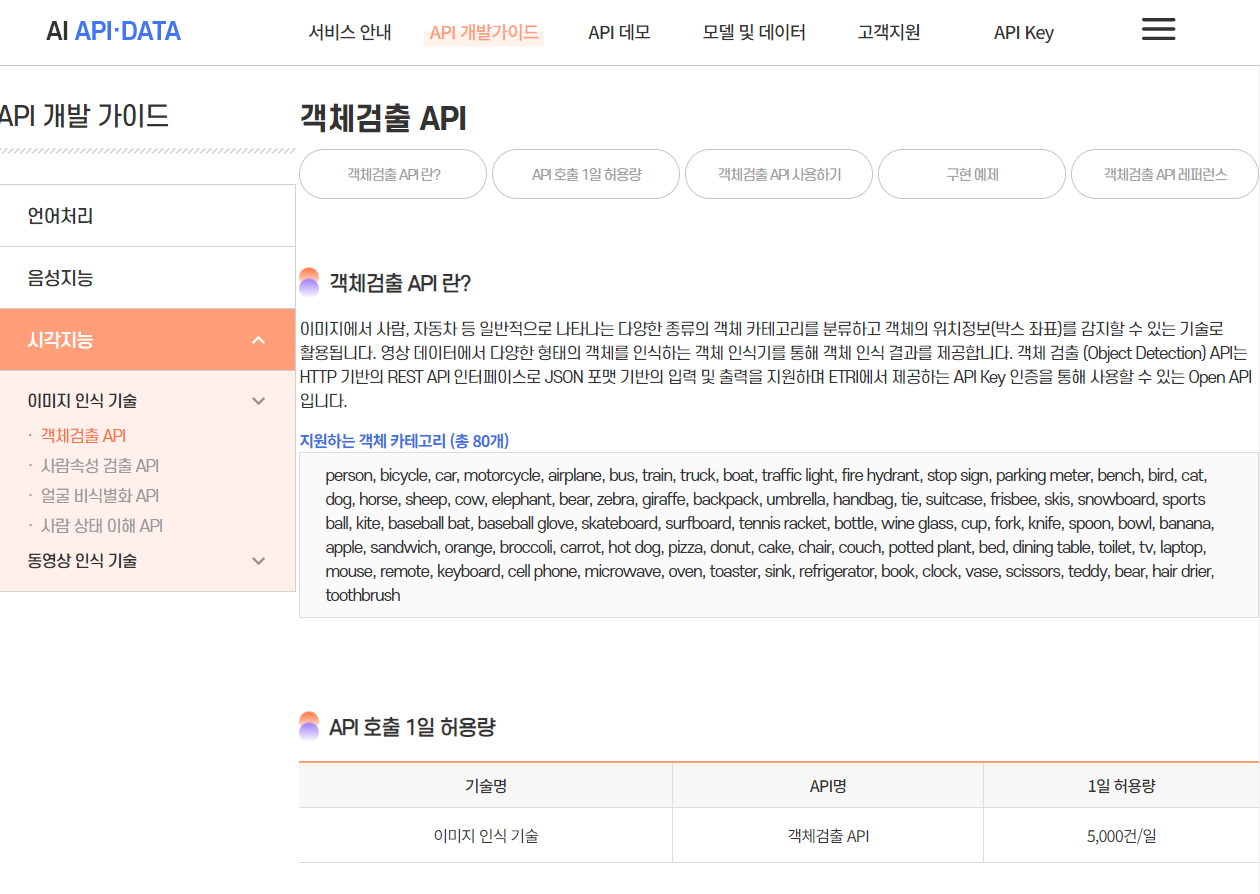

In [42]:
import urllib3
import json
import base64

In [43]:
apiurl = 'http://aiopen.etri.re.kr:8000/ObjectDetect'
accessK = '1969ef1b-913b-41be-8d0f-8824c460cfab'
img_path = r'd:/python/images/pig_1.jpg'
type = 'jpg'

In [44]:
file = open(img_path, 'rb')
imgcontents = base64.b64encode(file.read()).decode('utf8')
file.close()

In [45]:
requestJson = { "argument": {"type": type,
                             "file": imgcontents}
               }

In [46]:
http = urllib3.PoolManager()
response = http.request("POST",
                        apiurl,
                        headers={"Content-Type": "application/json; charset=UTF-8" , "Authorization": accessK},
                        body=json.dumps(requestJson))

In [47]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [48]:
print(response.data)

b'{"result":0,"return_object":{"data":[{"class":"cow","confidence":"0.971537","x":"197","y":"61","width":"129","height":"203"},{"class":"cow","confidence":"0.955756","x":"43","y":"104","width":"97","height":"173"},{"class":"cow","confidence":"0.840853","x":"123","y":"113","width":"99","height":"112"},{"class":"cow","confidence":"0.792397","x":"1","y":"109","width":"65","height":"112"}]}}'


In [49]:
rdata = json.loads(response.data)

In [50]:
rdata['return_object']['data'][0]['class']

'cow'

In [51]:
for i in range(len(rdata['return_object']['data'])):
    print(rdata['return_object']['data'][i]['class'])

cow
cow
cow
cow


In [60]:
requestJson['argument']['file']

'/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAE3AYMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9bz8ZY5YwouQM9cNz39QePw9q5bVPieLlDsmLk5wA3JLHnjHvnp+det6P8DfDq4E8m4YCj+MHgc8tkYz0yfbNWpP2f/D9xcoIXY/NyoCrxkkYyeOgP8uK+ohUwFObu2rJNWg7tWSavfo+3p2Z5so4ycdk09nzxur21tZbdV9

### 디코딩된 이미지텍스트 데이터를 다시 이미지로 전환하여 보기

In [53]:
from PIL import Image
import io

In [54]:
decoded_data = base64.b64decode(imgcontents)

In [55]:
img_s = Image.open(io.BytesIO(decoded_data))

In [56]:
img_s.show()

In [58]:
os.listdir(r'd:/python/images')

['.ipynb_checkpoints',
 'apple_1.jpg',
 'bike_1.jpg',
 'bike_2.jpg',
 'cow_1.jpg',
 'horse_1.jpg',
 'person_1.jpg',
 'person_2.jpg',
 'person_3.jpg',
 'person_4.jpg',
 'pig_1.jpg']